### 練習問題 (B)

In [21]:
toread = "data/MNIST/train-labels-idx1-ubyte"

f_bin = open(toread, mode="rb")

print(f_bin)

print("First four bytes:") # should be magic number, 2049.
b = f_bin.read(4)
print("bytes: ", b)
print(" int: ", int.from_bytes(b, byteorder="big"))

print("Second four bytes:") # should be number of observations, 60000.
b = f_bin.read(4)
print("bytes: ", b)
print(" int: ", int.from_bytes(b, byteorder="big"))

for t in range(times_todo):

    b = f_bin.read(1)
    mylabel = int.from_bytes(b, byteorder="big", signed=False)
    
    print("Label =", mylabel)

<_io.BufferedReader name='data/MNIST/train-labels-idx1-ubyte'>
First four bytes:
bytes:  b'\x00\x00\x08\x01'
 int:  2049
Second four bytes:
bytes:  b'\x00\x00\xea`'
 int:  60000
Label = 5
Label = 0
Label = 4
Label = 1
Label = 9


#### B-2

In [28]:
def seek_label(k):

    f_bin.seek(8 + k)
    b = f_bin.read(1)
    mylabel = int.from_bytes(b, byteorder="big", signed=False)
    
    print("Label =", mylabel)
    
seek_label(0)
seek_label(1)
seek_label(2)

Label = 5
Label = 0
Label = 4


#### B-3

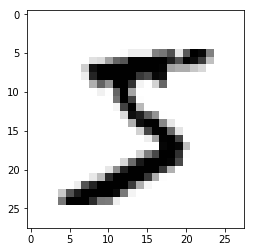

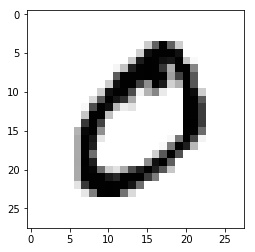

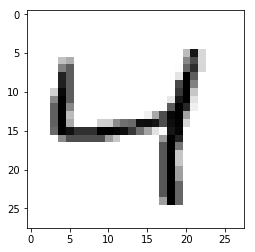

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def seek_image(k):

    toread = "data/MNIST/train-images-idx3-ubyte"

    f_bin = open(toread, mode="rb")

    n = 60000 # (anticipated) number of images.
    d = 28*28 # number of entries (int values) per image.
    times_todo = 5 # number of images to view.
    bytes_left = d
    data_x = np.zeros((d,), dtype=np.uint8) # initialize.
    idx = 0
    
    f_bin.seek(4*4 + d*k)

    while idx < bytes_left:
        b = f_bin.read(1)
        data_x[idx] = int.from_bytes(b, byteorder="big", signed=False)
        idx += 1
    img_x = data_x.reshape((28,28))
    plt.imshow(img_x, cmap=plt.cm.binary)
    plt.show()

    f_bin.close()

seek_image(0)
seek_image(1)
seek_image(2)


### 練習問題 (C)

#### C-3

In [64]:
toread = "data/MNIST/train-images-idx3-ubyte"
n = 60000
d = 28*28
bytes_left = n * d
data_X = np.empty((n*d,), dtype=np.uint8)

with open(toread, mode="rb") as f_bin:

    f_bin.seek(16) # go to start of images.
    idx = 0
    
    print("Reading binary file...", end=" ")
    while bytes_left > 0:
        b = f_bin.read(1)
        data_X[idx] = int.from_bytes(b, byteorder="big", signed=False)
        bytes_left -= 1
        idx += 1
    print("Done reading...", end=" ")
print("OK, file closed.")

print("Min:", np.min(data_X))
print("Mean:", np.mean(data_X))
print("Median:", np.median(data_X))
print("Max:", np.max(data_X))
print("StdDev:", np.std(data_X))

data_X_float = np.empty(data_X.shape, dtype=np.float32)
data_X_float = np.float32((data_X - np.min(data_X))/(np.max(data_X) - np.min(data_X)))

print("Min:", np.min(data_X_float))
print("Mean:", np.mean(data_X_float))
print("Median:", np.median(data_X_float))
print("Max:", np.max(data_X_float))
print("StdDev:", np.std(data_X_float))

Reading binary file... Done reading... OK, file closed.
Min: 0
Mean: 33.3184214498
Median: 0.0
Max: 255
StdDev: 78.5674899834
Min: 0.0
Mean: 0.130661
Median: 0.0
Max: 1.0
StdDev: 0.308108


In [65]:
data_X_float_reshaped = data_X_float.reshape((n, d))
mean_list = data_X_float_reshaped.mean(axis=0, keepdims=True)
std_list = data_X_float_reshaped.std(axis=0, keepdims=True)

data_X_float_reshaped_std = (data_X_float_reshaped - mean_list) / std_list
data_X_float_std = data_X_float_reshaped_std.reshape(-1)

data_X_float_std[np.isnan(data_X_float_std) | np.isinf(data_X_float_std)]=0

print("Min:", np.min(data_X_float_std))
print("Mean:", np.mean(data_X_float_std))
print("Median:", np.median(data_X_float_std))
print("Max:", np.max(data_X_float_std))
print("StdDev:", np.std(data_X_float_std))

/Users/ytakzk/.pyenv/versions/miniconda3-4.3.11/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Min: -1.27426
Mean: -5.34698e-06
Median: -0.0656897
Max: 244.949
StdDev: 0.95634
